In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [28]:
# Loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

# Splitting into Training data and Test Data

In [29]:
# print first 5 rows in the dataframe
gold_data.head()
# print last 5 rows of the dataframe
gold_data.tail()

gold_data.shape

(2290, 6)

In [30]:
# Convert the 'Date' column to datetime format and extract the year
gold_data['Year'] = pd.to_datetime(gold_data['Date']).dt.year


In [31]:
# Prepare the features and target variable
X = gold_data.drop(['Date', 'GLD'], axis=1)  # Features
Y = gold_data['GLD']  # Target variable

In [32]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [33]:
regressor = RandomForestRegressor(n_estimators=100)

In [34]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [35]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

Model Evaluation

In [36]:
# Evaluate the model using different metrics
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
mse = metrics.mean_squared_error(Y_test, test_data_prediction)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(Y_test, test_data_prediction)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")


Mean Absolute Error (MAE): 1.26
Mean Squared Error (MSE): 4.92
Root Mean Squared Error (RMSE): 2.22
R-squared Score (R2): 0.99


In [37]:
# Add predicted values to the test set for plotting
X_test_with_year = X_test.copy()
X_test_with_year['Year'] = gold_data.loc[X_test.index, 'Year']
X_test_with_year['Actual'] = Y_test
X_test_with_year['Predicted'] = test_data_prediction

In [38]:
# Sort by Year for better visualization
X_test_with_year.sort_values('Year', inplace=True)

In [39]:
# Check if the R-squared Score is >= 0.80
if r2 >= 0.80:
    print("The model's accuracy is acceptable (>= 80%).")
else:
    print("The model's accuracy is below 80%. Consider further improvements.")


The model's accuracy is acceptable (>= 80%).


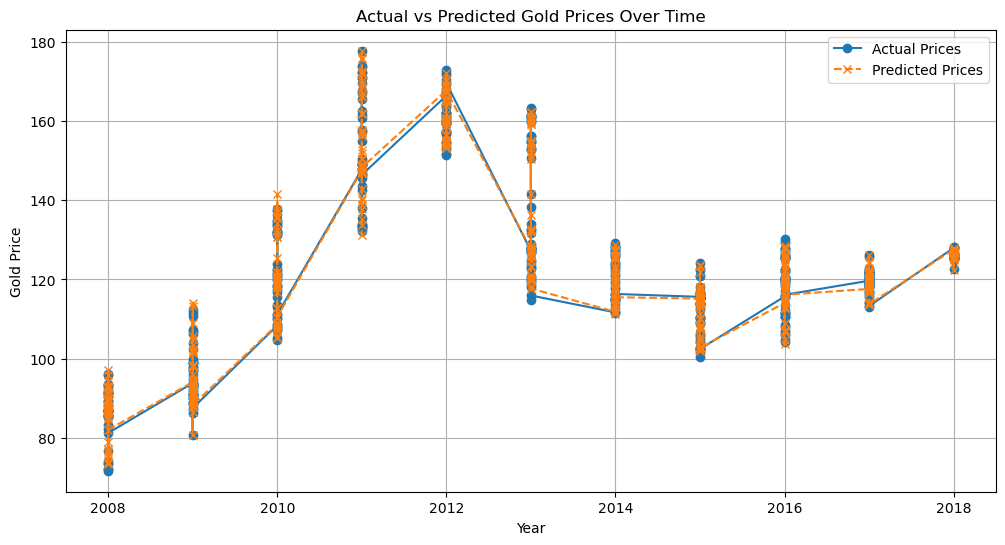

In [40]:
# Line Plot of Actual vs Predicted Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(X_test_with_year['Year'], X_test_with_year['Actual'], label='Actual Prices', marker='o')
plt.plot(X_test_with_year['Year'], X_test_with_year['Predicted'], label='Predicted Prices', marker='x', linestyle='--')
plt.title('Actual vs Predicted Gold Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.show()



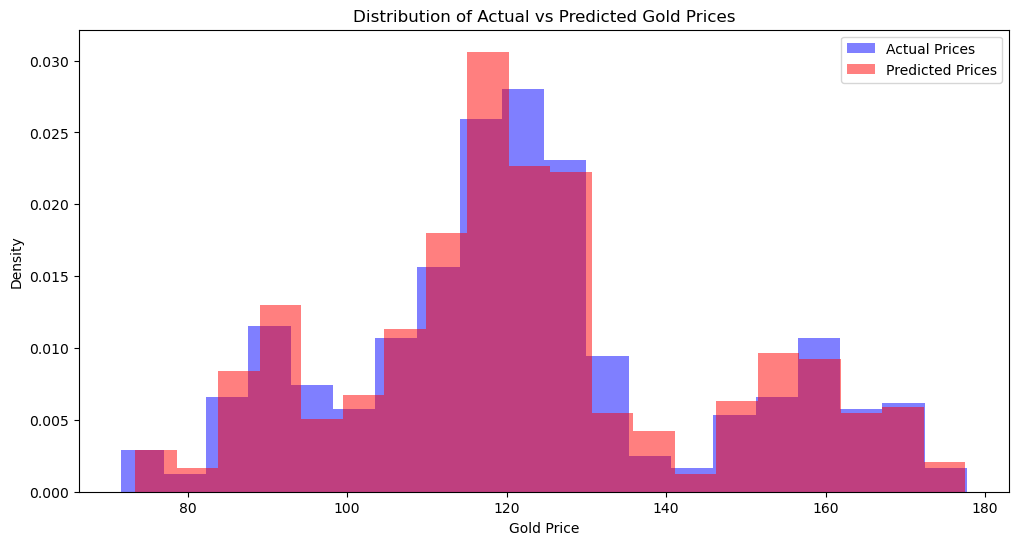

In [41]:
# Distribution Plot of Actual vs Predicted Values
plt.figure(figsize=(12, 6))
plt.hist(X_test_with_year['Actual'], bins=20, alpha=0.5, label='Actual Prices', color='blue', density=True)
plt.hist(X_test_with_year['Predicted'], bins=20, alpha=0.5, label='Predicted Prices', color='red', density=True)
plt.title('Distribution of Actual vs Predicted Gold Prices')
plt.xlabel('Gold Price')
plt.ylabel('Density')
plt.legend()
plt.show()

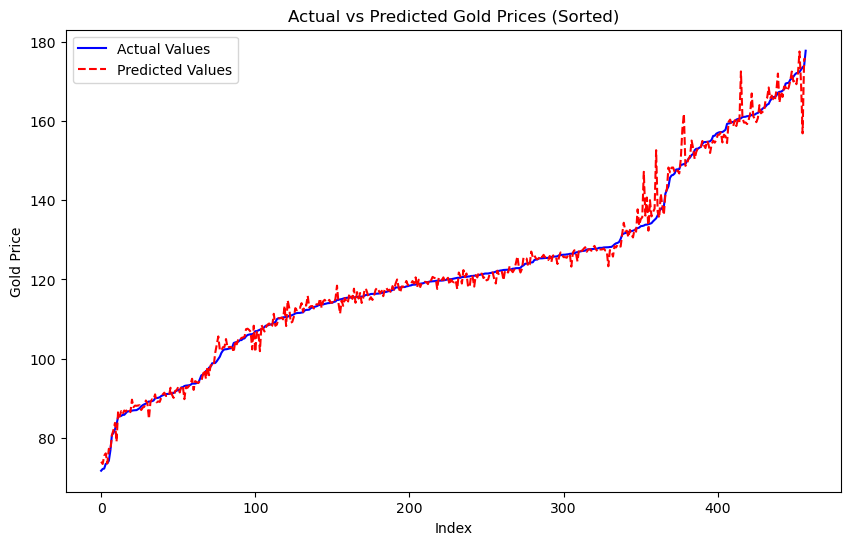

In [42]:
# Line Plot with Sorted Data
sorted_indices = np.argsort(Y_test)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Y_test)), Y_test.values[sorted_indices], label='Actual Values', color='b')
plt.plot(np.arange(len(Y_test)), test_data_prediction[sorted_indices], label='Predicted Values', color='r', linestyle='--')
plt.title('Actual vs Predicted Gold Prices (Sorted)')
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

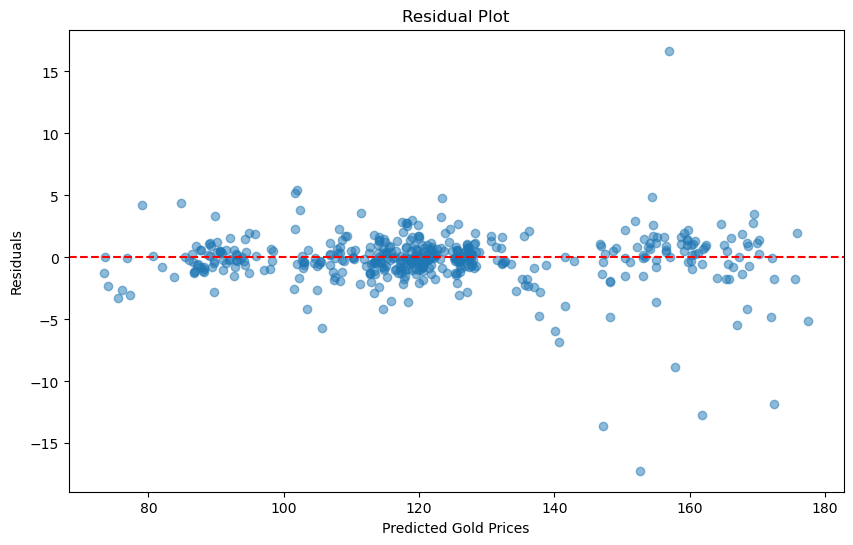

In [43]:
# Residual Plot
residuals = Y_test - test_data_prediction
plt.figure(figsize=(10, 6))
plt.scatter(test_data_prediction, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Gold Prices')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

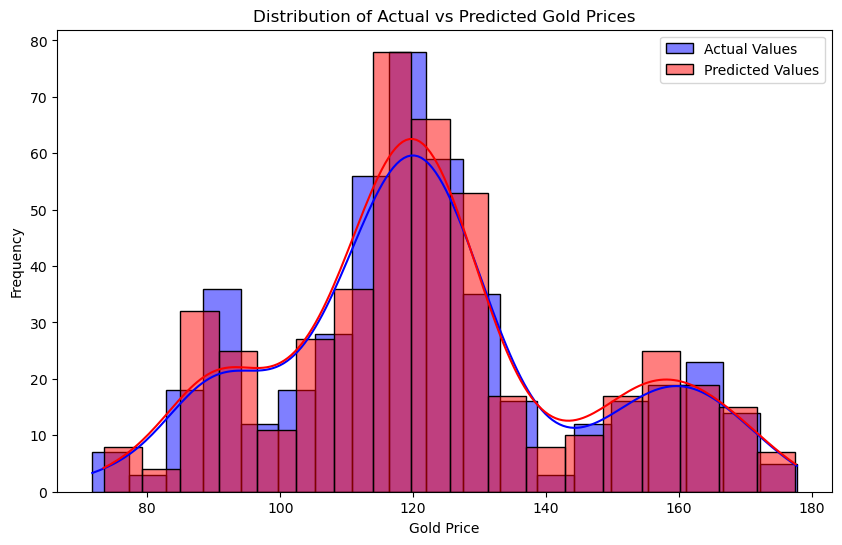

In [44]:
# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(Y_test, label='Actual Values', color='b', kde=True)
sns.histplot(test_data_prediction, label='Predicted Values', color='r', kde=True, alpha=0.5)
plt.title('Distribution of Actual vs Predicted Gold Prices')
plt.xlabel('Gold Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

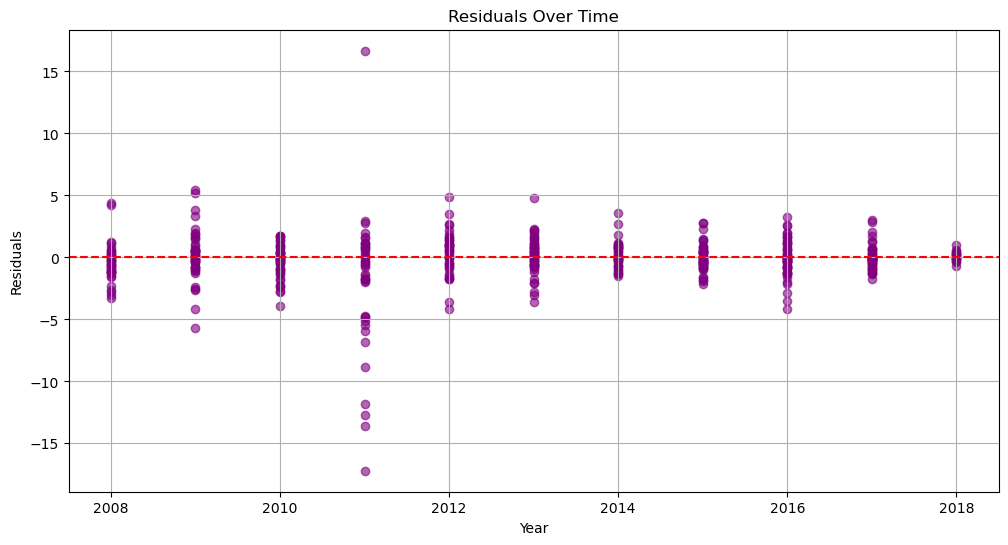

In [46]:
# Residuals Over Time
residuals = X_test_with_year['Actual'] - X_test_with_year['Predicted']
plt.figure(figsize=(12, 6))
plt.scatter(X_test_with_year['Year'], residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

